Praktikum ke-6 terdiri dari 3 bagian, yaitu:
1. Regularized linear regression
2. Bias-variance
3. Polynomial regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

Dalam praktikum ke-5 ini, anda akan mengimplementasi _regularized linear regression_ dan menggunakannya untuk mempelajari model-model dengan sifat _bias-variance_ yang berbeda.

# 1. Regularized Linear Regression

Bagian pertama dari praktikum membahas bagaimana anda akan mengimplementasi regularized linear regression untuk memprediksi jumlah air yang mengalir keluar dari bendungan dengan menggunakan perubahan ketinggian air di dalam waduk.

## 1.1 Visualisasi dataset
Kita akan mulai dengan memvisualisasikan dataset yang berisi history tentang perubahan ketinggian air, $x$, dan jumlah air yang mengalir keluar dari bendungan, $y$.

This dataset is divided into three parts:
- Data latih (_train set_) yang akan dipelajari oleh model anda: `X`, `y`
- Data validasi (_validation set_) untuk menentukan parameter regularisasi: `Xval`, `yval`
- Data uji (_test set_) untuk mengevaluasi kinerja model anda. Ini adalah contoh-contoh data "tak terlihat" yang tidak dilihat model anda selama _training_: `Xtest`, `ytest`

Selanjutnya, kita akan plot the training data sbb:

Loading and Visualizing data ...


Text(0, 0.5, 'Water following out of the dam (y)')

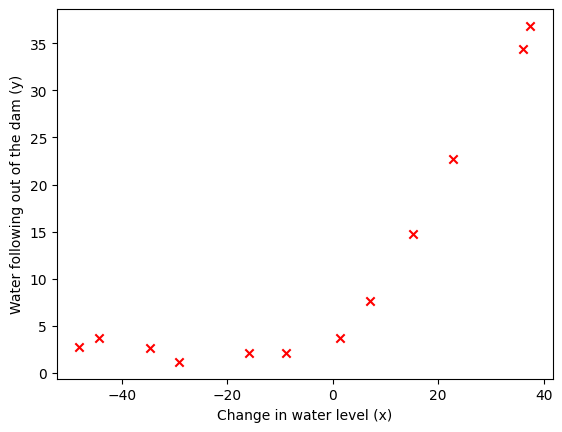

In [2]:
plt.ion()
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# The following code will load the dataset into your environment and pot
# the data.
#

# Load Training data
print('Loading and Visualizing data ...')

# Load from ex5data1:
data = scio.loadmat('ex5data1.mat')
X = data['X']
y = data['y'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()

m = y.size

# Plot training data
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water following out of the dam (y)')

## 1.2 Regularized linear regression cost function
Seperti yang sudah dijelaskan di kelas bahwa _regularized linear regression_ memiliki _cost function_ berikut:

$$
   J(\theta) = \underbrace{ \frac{1}{2m} \left( \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)} )^2 \right) }_{\text{MSE}}  + \underbrace{\frac{\alpha}{2m} \left( \sum_{j=1}^n{\theta_j^2} \right)}_{\text{suku regularisasi}}
$$

dengan $\alpha$ adalah parameter regularisasi yang mengontrol derajat regularisasi.

Suku regularisasi memberi penalti pada keseluruhan _cost function_ $J$. Saat parameter model $θ_j$ meningkat, penalti juga meningkat. Perhatikan bahwa anda sebaiknya tidak mengatur suku $θ_0$.

### Tugas anda
- Anda sekarang harus melengkapi fungsi `linearRegCostFunction`.
- Tugas anda adalah menulis fungsi untuk menghitung fungsi biaya regresi linier teregulasi.
- Jika memungkinkan, cobalah untuk membuat kode program anda dalam bentuk _vectorized_ dan hindari menulis loop.
Ketika anda selesai, anda akan menjalankan fungsi `linearRegCostFunction` anda dengan menggunakan $\theta$ yang diinisialisasi di \[1, 1\]. Hasilnya, anda akan melihat output `303.993`.

## 1.3 Regularized linear regression gradient
Gradient dalam kasus ini terdiri dari 2 bagian, yaitu:
$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)}) x_0^{(i)}}
$$

dan

$$
\frac{\partial J(\theta)}{\partial \theta_1} = \left( \frac{1}{m} \sum_{i=1}^m{ ( h_\theta(x^{(i)}) - y^{(i)} ) x_1^{(i)} } + \frac{\alpha}{m} \theta_1 \right).    
$$

Dalam implementasi kode dalam fungsi `linear_reg_cost_function`, $J$ diwakili oleh `cost` dan

$$
\texttt{grad} = \begin{bmatrix}
        \frac{\partial J(\theta)}{\partial \theta_0} \\
        \frac{\partial J(\theta)}{\partial \theta_1}
    \end{bmatrix}
$$

In [3]:
def linear_reg_cost_function(theta, x, y, alpha):
    # Initialize some useful values
    m = y.size

    # You need to return the following variables correctly
    cost = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instruksi : Hitunglah the cost and gradient dari regularized linear
    #                regression untuk suatu nilai theta
    #
    #                You should set 'cost' to the cost and 'grad'
    #                to the gradient
    #

    error = x @ theta - y

    cost = np.sum(error **2) / (2 * m) + np.sum(theta[1:] **2) * alpha / (2 * m)

    # menghitung gradient
    reg_term = theta * (alpha/m)
    reg_term[0] = 0
    # grad = np.dot(x, T, error) / m + reg_term
    grad = (x.T @ error) / m + reg_term

    # ==========================================================

    return cost, grad

Kita jalankan fungsi `linearRegCostFunction` dengan menggunakan theta bernilai `[1, 1]`.

In [4]:
# ===================== Part 2: Regularized Linear Regression Cost =====================
# You should have implemented the cost function for regularized linear regression.
# Now you are going to call the cost function.

theta = np.ones(2)
cost, _ = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

Kita cetak `cost` pada saat `theta = [1 1]`.

In [5]:
print(f'Cost at theta = [1  1]: {cost:0.6f}\n(this value should be about 303.993192')

Cost at theta = [1  1]: 303.993192
(this value should be about 303.993192


Selanjutnya, kita akan coba menghitung gradient yang disimpan dalam variabel `grad`.

In [6]:
# ===================== Part 3: Regularized Linear Regression Gradient =====================
# You should now have implemented the gradient for regularized linear regression.
# Now you are going to call the function.

theta = np.ones(2)
cost, grad = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

print('Gradient at theta = [1  1]: {}\n(this value should be about [-15.303016  598.250744]'.format(grad))

Gradient at theta = [1  1]: [-15.303016  598.250744]
(this value should be about [-15.303016  598.250744]


## 1.4 Melatih Model Linear Regression

Kita definisikan fungsi `train_linear_reg` yang akan menghitung `theta` dengan _cost_ paling minimum.

In [7]:
import numpy as np
import scipy.optimize as opt

# ===========================
#   Jangan diubah ya
# ===========================
def train_linear_reg(x, y, alpha):
    initial_theta = np.ones(x.shape[1])

    def cost_func(t):
        return linear_reg_cost_function(t, x, y, alpha)[0]

    def grad_func(t):
        return linear_reg_cost_function(t, x, y, alpha)[1]

    theta, *unused = opt.fmin_cg(cost_func, initial_theta, grad_func, maxiter=200, disp=False,
                                     full_output=True)

    return theta

Selanjutnya kita panggil method `train_linear_reg` untuk mendapatkan `theta` terbaik dan plot garis regresinya.

Text(0, 0.5, 'Water folowing out of the dam (y)')

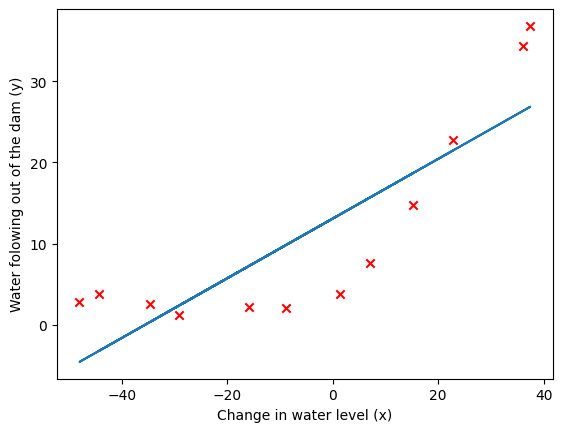

In [8]:
# ===================== Part 4: Train Linear Regression =====================
# Once you have implemented the cost and gradient correctly, the
# train_linear_reg function will use your cost function to train the regularized linear regression.
#
# Train linear regression with alpha = 0
alpha = 0

theta = train_linear_reg(np.c_[np.ones(m), X], y, alpha)

# Plot fit over the data
plt.plot(X, np.dot(np.c_[np.ones(m), X], theta))

plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

### Pertanyaan Refleksi
Apakah model regresi linier yang dibuat cocok dengan dataset yang ada?

**JAWAB**:
Tidak cocok, karena garis hanya lurus dan masih underfitting

- Meskipun visualisasi untuk mengetahui kecocokan model yang paling sesuai seperti yang ditunjukkan di atas adalah salah satu cara yang mungkin untuk men-debug algoritma pembelajaran anda, memvisualisasikan data dan model tidaklah selalu mudah.
- Di bagian berikutnya, anda akan mengimplementasikan fungsi untuk menghasilkan kurva pembelajaran (_learning curve_) yang dapat membantu anda men-debug algoritma pembelajaran jika memvisualisasikan data sulit untuk dilakukan.

# 2. Bias-variance
Konsep penting dalam machine learning adalah pertukaran bias-variance tradeoff. Model dengan **bias tinggi** tidak cukup kompleks untuk data dan cenderung _underfit_, sedangkan model dengan **variance tinggi** mengalami overfit dengan training data.

![bias-variance](bias-variance.png)     
Gambar di atas diambil dari _A Few Useful Things to Know About Machine Learning_ by Pedro Domingos.

Pada bagian latihan ini, anda akan memplot training dan test errors pada dengan kurva pembelajaran (_learning curve_) untuk mendiagnosa masalah bias-variance.

## 2.1 Learning curve
Anda sekarang akan mengimplementasi kode untuk menghasilkan _learning curve_ yang akan berguna dalam men-debug algoritme machine learning.

Ingatlah bahwa _learning curve_ memplot training dan validation error sebagai fungsi dari ukuran training set.

Tugas anda adalah melengkapi fungsi `learning_curve` sehingga fungsi mengembalikan vektor error untuk training set dan validation set.

In [9]:
def learning_curve(X, y, Xval, yval, alpha):
    # Number of training examples
    m = X.shape[0]

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    # ===================== Your Code Here =====================
    # Instruksi : Lengkapi fungsi ini untuk mengembalikan training errors dalam variabel
    #                error_train dan validation errors dalam error_val.
    #                i.e., error_train[i] and error_val[i] should give you
    #                the errors obtained after training on i examples
    #
    # Catatan : You should evaluate the training error on the first i training
    #           examples (i.e. X[:i] and y[:i])
    #
    #        For the validation error, you should instead evaluate on
    #        the _entire_ validation set (Xval and yval).
    #
    # Note : If you're using your cost function (linear_reg_cost_function)
    #        to compute the training and validation error, you should
    #        call the function with the alpha argument set to 0.
    #        Do note that you will still need to use alpha when running the
    #        training to obtain the theta parameters.
    #
    for i in range(m):
        x_i = X[:i+1]
        y_i = y[:i+1]
        theta = train_linear_reg(x_i, y_i, alpha)

        error_train[i] = linear_reg_cost_function(theta,x_i,y_i,0)[0]
        error_val[i] = linear_reg_cost_function(theta,Xval,yval,0)[0]

    # ==========================================================

    return error_train, error_val

Untuk memplot learning curve, kita memerlukan training set dan validation error untuk _training set size_ yang berbeda.

(np.float64(0.0), np.float64(13.0), np.float64(0.0), np.float64(150.0))

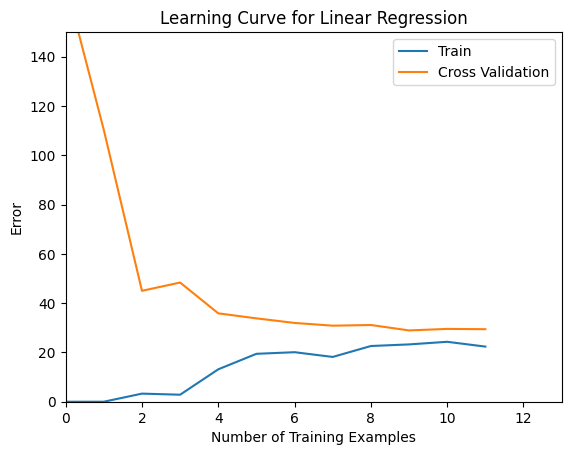

In [10]:
# ===================== Part 5: Learning Curve for Linear Regression =====================
# Next, you should have implemented the learning_curve function.
# Now you are going to call the function.

alpha = 0
error_train, error_val = learning_curve(np.c_[np.ones(m), X], y, np.c_[np.ones(Xval.shape[0]), Xval], yval, alpha)

plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Learning Curve for Linear Regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

## Pertanyaan Refleksi
Bagaimanakah _performance_ dari model linear regression di atas?

**Hint**: Jelaskan dari konsep bias-nya

**JAWAB**:
berdasarkan grafik di atas, kita dapat melihat bahwa pada awalnya test error sangat tinggi, namun setelah itu menjadi rendah dan menjadi bagus karena tingkat errornya dengan train set tidak jauh.

# Polynomial regression
- Masalah dengan model linier yang sudah dibuat adalah model linier terlalu sederhana untuk data dan menghasilkan underfitting (bias tinggi).
- Di bagian latihan ini, anda akan mengatasi masalah ini dengan menambahkan lebih banyak fitur.

Untuk menggunakan regresi polinomial (_polynomial regression_), hipotesis anda akan berbentuk:

$$
\begin{align}
    h_\theta(x) &= \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \cdots + \theta_p \times (\text{waterLevel})^p \\
                &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p.
\end{align}
$$

Perhatikan bahwa dengan mendefinisikan $x_1 = (\text{waterLevel})$, $x_2 = (\text{waterLevel})^2$, $\ldots$, $x_p = (\text{waterLevel})^p$, anda memperoleh model regresi linier dengan fiturnya adalah berbagai pangkat dari nilai asli ($\text{waterLevel}$).

In [11]:
def poly_features(X, p):
    # You need to return the following variable correctly.
    X_poly = np.zeros((X.size, p))

    # ===================== Write Your Code Here =====================
    # Instruksi : Diberikan vektor X, return a matrix X_poly where the p-th
    #                column of X contains the values of X to the p-th power.
    #

    P = np.arange(1, p+1)

    X_poly = X.reshape((X.size, 1)) ** P

    # ==========================================================

    return X_poly

In [12]:
X_coba = np.array([[1],[2],[3]])

In [13]:
poly_features(X_coba,3)

array([[ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]])

In [14]:
# =====================
#   Jangan diubah ya
# =====================
import matplotlib.pyplot as plt

def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05)

    X_poly = poly_features(x, p)
    X_poly -= mu
    X_poly /= sigma

    X_poly = np.c_[np.ones(x.size), X_poly]

    plt.plot(x, np.dot(X_poly, theta))

## 3.1 Polynomial regression

Setelah anda melengkapi fungsi `poly_features`, anda akan melanjutkan dengan melatih regresi polinomial menggunakan cost function regresi linier anda.

Untuk bagian latihan ini, anda akan menggunakan polinomial berderajat $8$.
Ternyata jika anda melatih pada data yang diproyeksikan (data berpolinomial berderajat $8$), _training_ tidak akan berjalan dengan baik karena fitur yang merupakan hasil penambahan fitur amatlah besar sehingga fitur tersebut perlu dinormalisasi (misalnya, contoh: $x = 40$ sekarang akan memiliki fitur yang bernilai $x^8 = 40^8 = 6,5 × 10^{12}$). Oleh karena itu, anda perlu menggunakan normalisasi fitur (_feature normalization_).

Berikut adalah fungsi untuk melakukan normalisasi fitur.

In [15]:
# =======================
#    Jangan diubah ya
# =======================
import numpy as np

def feature_normalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Mari kita
1. Buat fitur polinomial,
2. Normalisasi fitur polinomial tersebut,
3. Normalisasi juga `X_poly_test` dengan $\mu$ dan $\sigma$ dari train set.
4. Normalisasi juga `X_poly_val` dengan $\mu$ dan $\sigma$ dari train set.

In [16]:
# =========================================================================================
#    Jangan diubah ya tapi boleh dicobain satu per satu untuk melihat apa yang terjadi
# =========================================================================================
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.c_[np.ones(m), X_poly]

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = poly_features(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.c_[np.ones(X_poly_test.shape[0]), X_poly_test]

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = poly_features(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.c_[np.ones(X_poly_val.shape[0]), X_poly_val]

print('Normalized Training Example 1 : \n{}'.format(X_poly[0]))

Normalized Training Example 1 : 
[ 1.000000 -0.362141 -0.755087  0.182226 -0.706190  0.306618 -0.590878
  0.344516 -0.508481]


Mari kita lakukan eksperimen _hyperparameter tuning_ pada $\alpha$.     

Polynomial Regression (alpha = 100)
# Training Examples	Train Error		Validation Error
  	0		2.9512272540449578e-27	138.84677697582129
  	1		0.11410676145735973	144.12523056194374
  	2		106.95656783966666	70.86326961158822
  	3		121.74087713206998	78.37293799902466
  	4		102.94946035776623	63.84504683688769
  	5		97.16984651340135	59.53262603006984
  	6		83.32653795165433	59.58549300349345
  	7		76.49182516085699	58.69984223108787
  	8		71.29717920607393	59.56446296072831
  	9		64.35063565378047	59.731344360132915
  	10		58.997944696271496	60.409871674681675
  	11		57.97707721752721	57.84219068734774


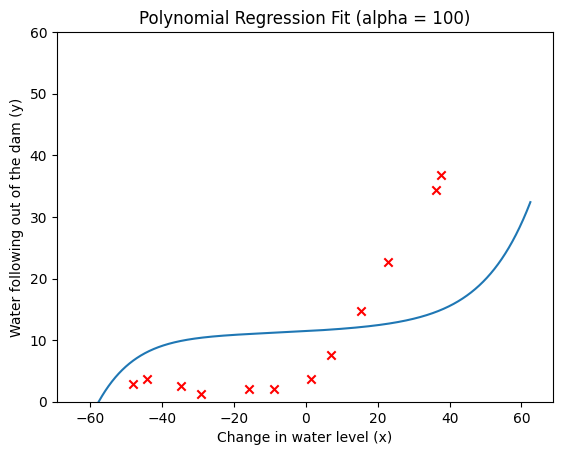

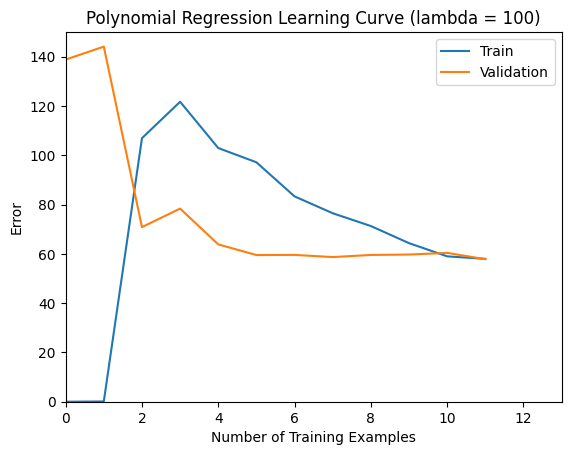

In [17]:
# ===================== Part 7 : Learning Curve for Polynomial Regression =====================
# Now, you will get to experiment with polynomial regression by using multiple
# values of alpha. The code below runs polynomial regression with
# alpha = 0. You should try running the code with different values of
# alpha to see how the fit and learning curve change.
#

alpha = 100
theta = train_linear_reg(X_poly, y, alpha)

# Plot training data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water following out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (alpha = {})'.format(alpha))

error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, alpha)
plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(alpha))
plt.legend(['Train', 'Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('Polynomial Regression (alpha = {})'.format(alpha))
print('# Training Examples\tTrain Error\t\tValidation Error')
for i in range(m):
    print('  \t{}\t\t{}\t{}'.format(i, error_train[i], error_val[i]))

### Pertanyaan Refleksi
1. Apakah model _polynomial regression_ cocok dengan dataset? ***tidak, karena saat alfanya 0 maka akan terjadi overfitting dan validation error akan tinggi***
2. Jelaskan _training error_ yang terjadi? ***train error tidak ada, dengan nilai 0***
3. Jelaskan _validation error_ yang terjadi? ***validation error high bias dan high variance***
4. Apakah yang terjadi pada model tersebut setelah model belajar dari $12$ training examples? ***kemungkinan validation error akan makin tinggi dan train error tetap o***
5. Coba anda lakukan kembali eksperimen di atas dengan $\alpha = 1$.
6. Apakah yang terjadi dengan model tersebut ketika anda menggunakan $\alpha = 1$? ***train error akan sedikit tinggi dari 0, tetapi masih tetap rendah. validation error awalnya tinggi tetapi berangsur-angsur menjadi rendah mendekati train error***
5. Coba anda lakukan kembali eksperimen di atas dengan $\alpha = 100$.
6. Apakah yang terjadi dengan model tersebut ketika anda menggunakan $\alpha = 100$? ***model menjadi sangat buruk yang dibuktikan dengan tingginya train error dan validation error***

## 3.3 Memilih $\alpha$ berdasarkan validation set

Di bagian ini, anda akan menerapkan metode otomatis untuk memilih $\alpha$ parameter.

Secara konkret, anda akan menggunakan validation set untuk mengevaluasi seberapa baik setiap nilai $\alpha$.
Setelah anda memilih nilai $\alpha$ terbaik dengan menggunakan validation set, kemudian anda dapat mengevaluasi model pada test set untuk memperkirakan seberapa baik prediksi model pada data aktual yang tidak terlihat.

Tugas Anda adalah melengkapi kode di fungsi `validation_curve`.
Secara khusus, anda harus menggunakan fungsi `train_linear_reg` untuk melatih model dengan menggunakan nilai $\alpha$ yang berbeda dan menghitung training error dan validation error.    
Anda sebaiknya mencoba $\alpha$ dalam rentang sbb: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [18]:
def validation_curve(X, y, Xval, yval):
    # Selected values of alpha (don't change this)
    alpha_vec = np.array([0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros(alpha_vec.size)
    error_val = np.zeros(alpha_vec.size)

    # ===================== Write Your Code Here =====================
    # Instruksi : Lengkapi fungsi ini untuk mengembalikan training errors dalam variabel
    #                error_train and the validation errors dalam error_val. The
    #                vector alpha_vec contains the different alpha parameters
    #                to use for each calculation of the errors, i.e,
    #                error_train[i], and error_val[i] should give
    #                you the errors obtained after training with
    #                alpha = alpha_vec[i]
    #

    for i in range(alpha_vec.size):
        alpha = alpha_vec[i]
        theta = train_linear_reg(X, y, alpha)

        error_train[i] = linear_reg_cost_function(theta,X,y,0)[0]
        error_val[i]   = linear_reg_cost_function(theta,Xval,yval,0)[0]

    # ==========================================================

    return alpha_vec, error_train, error_val

Alpha		Train Error	Validation Error
 0.0		0.03787234090203936	27.207874821191975
 0.001		0.1127059357435401	9.854576312327655
 0.003		0.17087260459829154	16.289940132760012
 0.01		0.22149981853316444	16.948498007001405
 0.03		0.2818506889615275	12.828897280584407
 0.1		0.4593166198800791	7.58690470776673
 0.3		0.9217579769884593	4.636828434858314
 1.0		2.0761916111768453	4.260643165794295
 3.0		4.901349911371022	3.8229095738062067
 10.0		16.09223009337855	9.945518305848159


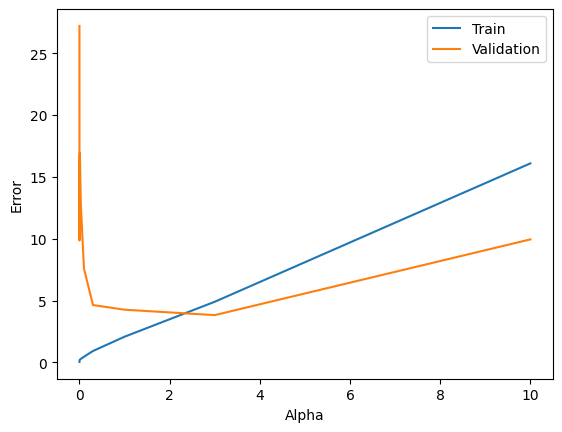

In [19]:
# ===================== Part 8 : Validation for Selecting Alpha =====================
# You will now implement validation_curve to test various values of
# alpha on a validation set. You will then use this to select the
# 'best' alpha value.

# ====================
#  Jangan diubah ya
# ====================
alpha_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

plt.figure()
plt.plot(alpha_vec, error_train, alpha_vec, error_val)
plt.legend(['Train', 'Validation'])
plt.xlabel('Alpha')
plt.ylabel('Error')
print('Alpha\t\tTrain Error\tValidation Error')
for i in range(alpha_vec.size):
    print(' {}\t\t{}\t{}'.format(alpha_vec[i], error_train[i], error_val[i]))

### Pertanyaan Refleksi
Berdasarkan plot di atas, berapakah nilai $\alpha$ yang terbaik? ***Berdasarkan grafik di atas, maka nilai Alpha terbaik bisa kita lihat dari nilai validation error paling minimum, yakni pada Alpha = 3. ***
**Hint**: Pilih $\alpha$ bilangan bulat.


## 3.4 Hitung error pada test set

Finally, anda akan menghitung error pada test set atau yang biasa disebut _test error_.    
Sebelum anda menghitung _test error_, anda akan melatih model dengan menggunakan gabungan train set dan validation set dan best $\alpha$.

# Anda gabungkan `X_poly` dan `X_poly_val`.

In [20]:
#### Write Your Code Here ####
X_train_final = np.concatenate((X_poly, X_poly_val), axis=0)

Anda gabungkan `y` dan `yval`.

In [21]:
#### Write Your Code Here ####
y_train_final = np.concatenate((y, yval), axis=0)

Hitunglah $\theta$ yang merupakan hasil latih linear regression dengan $\alpha$ terbaik.    
**Hint**: Gunakan fungsi `train_linear_reg`

In [22]:
#### Write Your Code Here ####
theta_final = train_linear_reg(X_train_final, y_train_final, 3)

Hitunglah test error dengan pada `X_poly_test` dan `ytest`.    

**Hint**: Gunakan fungsi `linear_reg_cost_function`

In [25]:
#### Write Your Code Here ####
linear_reg_cost_function(theta_final,X_poly_test,ytest,3)

(np.float64(10.879231614827866),
 array([-0.777546, -0.476945,  0.139460, -0.926133, -0.171527, -0.889162,
        -0.479243, -0.592771, -0.843663]))

<center><h1>The End</h1></center>